# Regression using tensorflow
Here I used a dataset containing information about houses and I predicted the price of the house using different regression techniques such as **linear regression** and using a **DNN**.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

Functions to help with plotting graphs.

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0,20])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Price]')
  plt.legend()

def plot_predictions(model):
  x = tf.linspace(24.93, 25.01, 80)
  y = model.predict(x)
  plt.scatter(train_features['X5 latitude'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Distance to the nearest MRT station')
  plt.ylabel('Price of house')

### Setting up an input pipeline
Creating a train and test dataset from the original dataset.

In [ ]:
df = pd.read_csv('Data/Real estate.csv')
df = df.set_index('No')
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
x_values = ['X1 transaction date',
            'X2 house age',
            'X3 distance to the nearest MRT station',
            'X4 number of convenience stores',
            'X5 latitude',
            'X6 longitude']
# This part below cleans the data and eliminates anomalies
for col in x_values:
  mean = df[col].mean()
  sd = df[col].std()
  df = df[(df[col] <= mean+(3*sd))]
train_ds = df.sample(frac=0.8, random_state=0)
test_ds = df.drop(train_ds.index)

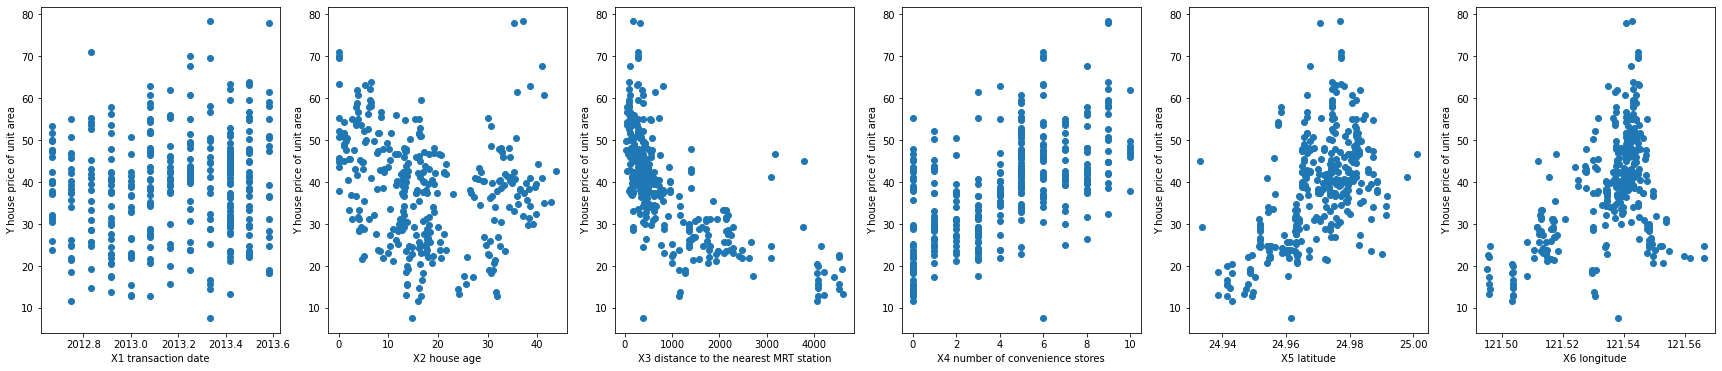

In [ ]:
fig, axs = plt.subplots(ncols=6, figsize=(30, 6))
for i in range(6):
  axs[i].scatter(train_ds[x_values[i]], train_ds['Y house price of unit area'])
  axs[i].set_xlabel(x_values[i])
  axs[i].set_ylabel('Y house price of unit area')
plt.show()

We are testing the data with the house price so that is why *train_labels* and *test_labels* are the house price.

In [ ]:
train_features = train_ds.copy()
test_features = test_ds.copy()

train_labels = train_features.pop('Y house price of unit area')
test_labels = test_features.pop('Y house price of unit area')

Graph 3 stands out as a graph that could use linear regression to predict house prices the most, however we will use graph 5 to show how using multiple variables can be beneficial as there could be lots of variables to a dataset.

In [ ]:
nearest_station = np.array(train_features['X5 latitude'])
normalizer = layers.Normalization(input_shape=[1,], axis=None)
normalizer.adapt(nearest_station)

## linear regression

### Building the model

In [ ]:
linear_model = keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
linear_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 1)                3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


### Compiling the model

In [ ]:
linear_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

### Training the model

In [ ]:
history = linear_model.fit(
    train_features['X5 latitude'],
    train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2)

### Plotting graphs

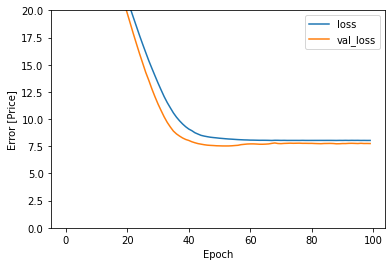

In [ ]:
plot_loss(history)

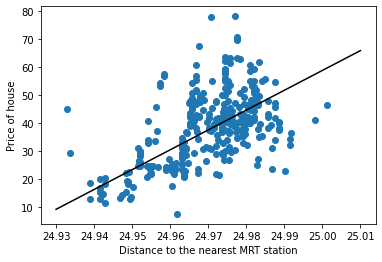

In [ ]:
plot_predictions(linear_model)

storing the results for later

In [ ]:
test_results = {}
test_results['linear_model'] = linear_model.evaluate(
    test_features['X5 latitude'], test_labels,
     verbose=0)

## Regression with a DNN

### Creating the model

In [ ]:
dnn_model = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

### Compiling the model

In [ ]:
dnn_model.compile(
    optimizer = keras.optimizers.Adam(),
    loss='mean_absolute_error'
)

### Training the model

In [ ]:
history = dnn_model.fit(
    train_features['X5 latitude'],
    train_labels,
    validation_split=0.2,
    verbose=0,
    epochs=100
)

### plotting graphs

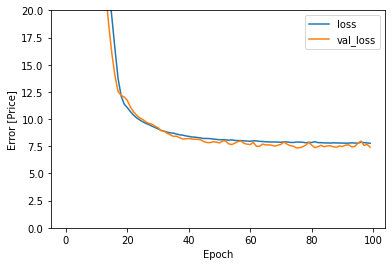

In [ ]:
plot_loss(history)

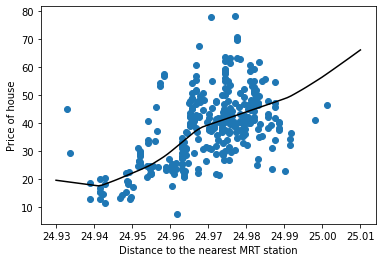

In [ ]:
plot_predictions(dnn_model)

storing the test results for later

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(
    test_features['X5 latitude'], test_labels,
    verbose=0
)

## Regression with multiple variables

Normalizing the data by allowing 6 different x variables worth of data to be used in the model.

In [ ]:
features = np.array(train_features)
normalizer = layers.Normalization(input_shape=[6,], axis=None)
normalizer.adapt(features)

### Creating the linear model

In [ ]:
multiple_linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

### Compiling the linear model

In [ ]:
multiple_linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

### Training the data

In [ ]:
history = multiple_linear_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0,
    epochs=100
)

Storing the test results for later.

In [ ]:
test_results['multiple_linear_model'] = multiple_linear_model.evaluate(
    test_features, test_labels, verbose=0)

### Creating the dnn model

In [ ]:
multiple_dnn_model = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

### Compiling the dnn model

In [ ]:
multiple_dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='mean_absolute_error')

### Training the dnn model

In [ ]:
history = multiple_dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0,
    epochs=100
)

Storing the test results for later.

In [ ]:
test_results['multiple_dnn_model'] = multiple_dnn_model.evaluate(
    test_features, test_labels, verbose=0)

## Results

Here the results are better when using multiple variables because there is a set of data that is better at prediciting house price using a different x value. This set of data is X3 being the distance to the next MRT station.

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [Price]']).T

,Mean absolute error [Price]
linear_model,9.163721
dnn_model,9.084592
multiple_linear_model,8.131392
multiple_dnn_model,7.183463
